In [ ]:
import tensorflow as tf

In [ ]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [ ]:
X_train.shape

(50000, 32, 32, 3)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
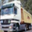

In [ ]:
X_train[1]

In [ ]:
X_test.shape

(10000, 32, 32, 3)

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]], dtype=uint8)
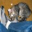

In [ ]:
X_test[0]

In [ ]:
X_train[0].max()

255

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
X_train[0].max()

1.0

In [ ]:
import numpy as np
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
y_train_enc = tf.keras.utils.to_categorical(y_train)
y_test_enc = tf.keras.utils.to_categorical(y_test)

In [ ]:
X_train.shape

(50000, 32, 32, 3)

## Modeling

In [ ]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(8, input_shape=(32,32,3),kernel_size=5,strides=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Conv2D(16,kernel_size=5,strides=1))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(120))
model.add(tf.keras.layers.Dense(84))
model.add(tf.keras.layers.Dense(10, activation="softmax"))



In [ ]:
#model.add(tf.keras.layers.Conv2D(8, strides=1, input_shape=(32,32,3), kernel_size=5))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
#model.add(tf.keras.layers.Conv2D(16, strides=1,kernel_size=5))
#model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides=2))
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(120))
#model.add(tf.keras.layers.Dense(84))
#model.add(tf.keras.layers.Dense(10, activation="softmax"))


In [ ]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 8)         608       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 16)        3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 dense (Dense)               (None, 120)               4

In [ ]:
model.fit(X_train, y_train_enc, epochs=2, validation_split=0.2)

Epoch 1/2


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1151, in train_step
        loss = self.compute_loss(x, y, y_pred, sample_weight)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1209, in compute_loss
        return self.compiled_loss(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/compile_utils.py", line 277, in __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 143, in __call__
        losses = call_fn(y_true, y_pred)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 270, in call  **
        return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/losses.py", line 2454, in sparse_categorical_crossentropy
        return backend.sparse_categorical_crossentropy(
    File "/usr/local/lib/python3.10/dist-packages/keras/src/backend.py", line 5775, in sparse_categorical_crossentropy
        res = tf.nn.sparse_softmax_cross_entropy_with_logits(

    ValueError: `labels.shape` must equal `logits.shape` except for the last dimension. Received: labels.shape=(320,) and logits.shape=(32, 10)
